(data-science:matplotlib)=
# Analyzing data with `pandas` and `matplotlib`

Visualization is an essential part of scientific programming. Being able to communicate scientific results in a way that is understandable for a broader community is an art that requires a lot of thought into what types of visual representation of the data one wants to use.

An excellent recent example is the *Summary for policymakers* report from the Intergovernmental Panel on Climate Change that was published in 2021. Below is a figure taken from the report, which explains how the global surface temperature has changed in the last years

```{figure} ../../figures/fn_klima.png
---
width: 700px
name: fn_klima
alt: fn_klima
---
Figure 1 from [Summary for Policymakers](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM_final.pdf) written by the Intergovernmental Panel on Climate Change.
```
A very important point when making scientific visualizations is to communicate to the audience the message in the results and, at the same time, create visualizations that objectively display the results. There are [several examples](https://www.nrk.no/norge/venstre-dempet-skrytegrafen-om-klimakutt-etter-massiv-kritikk-1.14768128) where visualizations are used in ways that make people get the wrong impression.

While there are several ethical concerns when presenting scientific results, having the skills to create nice-looking visualizations is a prerequisite. In this section, we will therefore focus on how to create and style figures using Matplotlib, which is probably the most used library for visualizing simple graphs. To install Matplotlib either use `pip`
```
pip install matplotlib
```
or `conda` as follows
```
conda install -y matplotlib
```

## Getting a dataset for testing
To make the exercise of visualizing data slightly more interesting, we will use a real-world example: a public dataset about COVID-19 in Norway which is available at <https://github.com/thohan88/covid19-nor-data>. This repository is regularly updated, but for the sake of reproducibility, we will use data from a particular time stamp dating back to November 2021. To download the table with infected people, we can use the following code snippet

In [1]:
path = "infected.csv"
url = "https://raw.githubusercontent.com/thohan88/covid19-nor-data/37b6b32d32db05b08dda15f002dcc2198836d4c1/data/01_infected/msis/municipality_wide.csv"

# Download data
import urllib.request

urllib.request.urlretrieve(url, path)

('infected.csv', <http.client.HTTPMessage at 0x7f97eb16b640>)

This will save the data to a file called `infected.csv`.

## Basic operations with `pandas`
We can load the files downloaded above with another popular data science library called pandas.

Again, to install pandas, we can either use `pip`
```
pip install pandas
```
or `conda`
```
conda install -y pandas
```


### Loading data into a `pandas.DataFrame`
With the installed packages, it is now possible to import pandas and load the content of the file into something called a pandas DataFrame

In [2]:
import pandas as pd

pd.set_option(
    "display.max_columns", 7
)  # This options is only for visualization on the web
pd.set_option(
    "display.max_rows", 10
)  # This options is only for visualization on the web

df = pd.read_csv(path)

Note that similar to NumPy, which is usually imported as `np`, it is common to import pandas as `pd`. Furthermore, `df` is a `pandas.DataFrame` object

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


It is possible to select and display parts of the DataFrame using the slice operator. We can, for example, display the first 10 rows as follows

In [4]:
df[:10]

time  kommune_no kommune_name  ...  2021-11-07 2021-11-08  2021-11-09
0  04:00:00         301         Oslo  ...       58658      58874       59165
1  04:00:00        1101    Eigersund  ...         188        188         188
2  04:00:00        1103    Stavanger  ...        4328       4352        4374
3  04:00:00        1106    Haugesund  ...        1501       1511        1533
4  04:00:00        1108      Sandnes  ...        1776       1794        1819
5  04:00:00        1111      Sokndal  ...          18         18          18
6  04:00:00        1112         Lund  ...          45         45          45
7  04:00:00        1114    Bjerkreim  ...          37         37          37
8  04:00:00        1119           Hå  ...         354        354         355
9  04:00:00        1120        Klepp  ...         422        425         426

[10 rows x 599 columns]

or using the `head` method

In [5]:
df.head(10)

time  kommune_no kommune_name  ...  2021-11-07 2021-11-08  2021-11-09
0  04:00:00         301         Oslo  ...       58658      58874       59165
1  04:00:00        1101    Eigersund  ...         188        188         188
2  04:00:00        1103    Stavanger  ...        4328       4352        4374
3  04:00:00        1106    Haugesund  ...        1501       1511        1533
4  04:00:00        1108      Sandnes  ...        1776       1794        1819
5  04:00:00        1111      Sokndal  ...          18         18          18
6  04:00:00        1112         Lund  ...          45         45          45
7  04:00:00        1114    Bjerkreim  ...          37         37          37
8  04:00:00        1119           Hå  ...         354        354         355
9  04:00:00        1120        Klepp  ...         422        425         426

[10 rows x 599 columns]

## Selecting columns
We can select a single column by treating the DataFrame as a dictionary with keys being the column's names. For example, one column name in this DataFrame is `kommune_name`, and it can be extracted as follows

In [6]:
kommune_name = df["kommune_name"]
kommune_name

0                Oslo
1           Eigersund
2           Stavanger
3           Haugesund
4             Sandnes
            ...      
353           Nesseby
354         Båtsfjord
355      Sør-Varanger
356          Svalbard
357    Ukjent Kommune
Name: kommune_name, Length: 358, dtype: object

Note, however, that `kommune_name` is not a `pandas.DataFrame` but a `pandas.Series` instead

In [7]:
print(type(kommune_name))

<class 'pandas.core.series.Series'>


More specifically, each column of a `pandas.DataFrame` is a `pandas.Series`.

We can also select several columns by passing in a list of columns names, e.g.

In [8]:
kommune_pop = df[["kommune_name", "population"]]
kommune_pop

kommune_name  population
0              Oslo      693494
1         Eigersund       14811
2         Stavanger      143574
3         Haugesund       37357
4           Sandnes       79537
..              ...         ...
353         Nesseby         926
354       Båtsfjord        2221
355    Sør-Varanger       10158
356        Svalbard           0
357  Ukjent Kommune           0

[358 rows x 2 columns]

Notice the specific use of the list of names. A common mistake is to forget about the second pair of square brackets and try to do `df["kommune_name", "population"]`.

In the above case, `kommune_pop` is again a `pandas.DataFrame` object, as it is indeed more than a single column.

In [9]:
print(type(kommune_pop))

<class 'pandas.core.frame.DataFrame'>


### Plotting using the pandas API
`pandas.DataFrame` has a built-in method called `plot` for visualizing the data. This is very handy when the goal is to quickly show a visualization of the data. For example, to plot the population in the first 30 municipalities as a bar plot, we can do the following

<Axes: xlabel='kommune_name'>

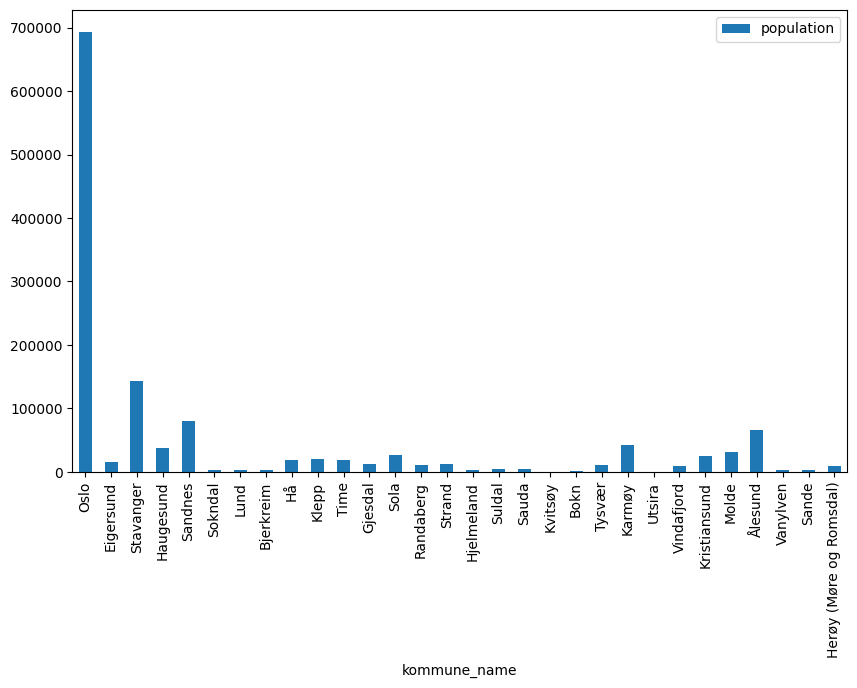

In [10]:
df[:30].plot(x="kommune_name", y="population", kind="bar", figsize=(10, 6))

We refer to the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for more information about the `plot` method. While this is appropriate for quick visualizations, it has some limitations when one wants to have full control over the process, which motivates the use Matplotlib directly.

### Selecting a subset of the data based on some criterion
Very often, when working with big datasets, it is necessary to focus on a particular subset of the data that meets some requirements. One example in our case could be wanting to look at all the municipalities that are part of Viken fylke. The first naive approach might be to loop through all the rows and check whether the column `"fylke_name"` is equal to `"Viken"`, appending it to some list if the condition is satisfied

In [11]:
viken = pd.DataFrame(
    [row for index, row in df.iterrows() if row["fylke_name"] == "Viken"]
)
viken

time  kommune_no   kommune_name  ...  2021-11-07 2021-11-08  \
91   04:00:00        3001         Halden  ...        1271       1273   
92   04:00:00        3002           Moss  ...        2162       2178   
93   04:00:00        3003      Sarpsborg  ...        3772       3780   
94   04:00:00        3004    Fredrikstad  ...        4806       4826   
95   04:00:00        3005        Drammen  ...        6140       6156   
..        ...         ...            ...  ...         ...        ...   
137  04:00:00        3050       Flesberg  ...          47         47   
138  04:00:00        3051         Rollag  ...          10         10   
139  04:00:00        3052  Nore og Uvdal  ...          18         18   
140  04:00:00        3053       Jevnaker  ...         204        204   
141  04:00:00        3054         Lunner  ...         292        292   

     2021-11-09  
91         1277  
92         2194  
93         3799  
94         4842  
95         6202  
..          ...  
137          47  
138          10  
139          18  
140         207  
141         294  

[51 rows x 599 columns]

However, there is a much more efficient way to do this. First, we create a boolean Series as follows,

In [12]:
df["fylke_name"] == "Viken"

0      False
1      False
2      False
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: fylke_name, Length: 358, dtype: bool

then, we evaluate the DataFrame at those entries that evaluate to `True`

In [13]:
viken = df[df["fylke_name"] == "Viken"]
viken

time  kommune_no   kommune_name  ...  2021-11-07 2021-11-08  \
91   04:00:00        3001         Halden  ...        1271       1273   
92   04:00:00        3002           Moss  ...        2162       2178   
93   04:00:00        3003      Sarpsborg  ...        3772       3780   
94   04:00:00        3004    Fredrikstad  ...        4806       4826   
95   04:00:00        3005        Drammen  ...        6140       6156   
..        ...         ...            ...  ...         ...        ...   
137  04:00:00        3050       Flesberg  ...          47         47   
138  04:00:00        3051         Rollag  ...          10         10   
139  04:00:00        3052  Nore og Uvdal  ...          18         18   
140  04:00:00        3053       Jevnaker  ...         204        204   
141  04:00:00        3054         Lunner  ...         292        292   

     2021-11-09  
91         1277  
92         2194  
93         3799  
94         4842  
95         6202  
..          ...  
137          47  
138          10  
139          18  
140         207  
141         294  

[51 rows x 599 columns]

Let us time the difference between the two approaches

In [14]:
%timeit -n 5 -r 10 pd.DataFrame([row for index, row in df.iterrows() if row["fylke_name"] == "Viken"])

51.3 ms ± 2.23 ms per loop (mean ± std. dev. of 10 runs, 5 loops each)


In [15]:
%timeit -n 5 -r 10 df[df["fylke_name"] == "Viken"]

543 µs ± 77.2 µs per loop (mean ± std. dev. of 10 runs, 5 loops each)


This concept might be familiar to those who have worked with NumPy arrays before. Consider the following NumPy array

In [16]:
import numpy as np

np.random.seed(1)
x = np.random.randint(0, 20, size=20)
x

array([ 5, 11, 12,  8,  9, 11,  5, 15,  0, 16,  1, 12,  7, 13,  6, 18,  5,
       18, 11, 10])

Suppose that we would like to get all the values larger than 10. We can achieve that with a list comprehension as follows

In [17]:
[xi for xi in x if xi > 10]

[11, 12, 11, 15, 16, 12, 13, 18, 18, 11]

However, it is much more efficient to do the following

In [18]:
x[x > 10]

array([11, 12, 11, 15, 16, 12, 13, 18, 18, 11])

The reason is that both NumPy and pandas perform these operations in `C`, which is much more efficient than the purely pythonic list comprehensions.

For completeness, let us also time the NumPy operations

In [19]:
%timeit -n 10 -r 1000 [xi for xi in x if xi > 10]

The slowest run took 11.95 times longer than the fastest. This could mean that an intermediate result is being cached.
3.35 µs ± 1.63 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


In [20]:
%timeit -n 10 -r 1000  x[x > 10]

The slowest run took 41.15 times longer than the fastest. This could mean that an intermediate result is being cached.
2.51 µs ± 3.97 µs per loop (mean ± std. dev. of 1000 runs, 10 loops each)


Let us look at the data for Oslo

In [21]:
oslo = df[df["fylke_name"] == "Oslo"]
oslo

time  kommune_no kommune_name  ...  2021-11-07 2021-11-08  2021-11-09
0  04:00:00         301         Oslo  ...       58658      58874       59165

[1 rows x 599 columns]

### Extracting the data of the number of infected in Oslo and Norway
For our DataFrame, the first 6 values in each row are information about the municipality

In [22]:
oslo.keys()[:10]

Index(['time', 'kommune_no', 'kommune_name', 'fylke_no', 'fylke_name',
       'population', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29'],
      dtype='object')

The actual data of the registered infectious people starts at column 7 (index 6), where the column's name is the date when the registration happened. We can pull out this data into a NumPy array using the `.values` attribute

In [23]:
oslo_infected = oslo.values[0, 6:].astype(int)

Here the first dimension represents the rows (which is just one in our case), and the second dimension represents the columns (and we would like to extract all columns from index 6). Finally, we also make sure to convert the array to integers because the default behavior is to use `object` as the datatype, which is far less efficient than working with integers.

We could, of course, do the same with the entire dataset, which has the shape

In [24]:
df.values.shape

(358, 599)

We could, for example, use this data to obtain the number of infected people in all of Norway by summing up all values along the columns (or the first axis at index 0). This can be done as follows

In [25]:
norway_infected = df.values[:, 6:].astype(int).sum(0)

## Plotting
We are now ready to start working with Matplotlib. The First thing we need to do is to import it. Although Matplotlib is a big library containing a lot of functionality for plotting, we will mainly be using the subpackage called `pyplot`. This subpackage contains the main functionality to do basic plotting, and it is common to import it as follows

In [26]:
import matplotlib.pyplot as plt

Let us first display the data for Oslo and Norway in the same plot using Matplotlib.

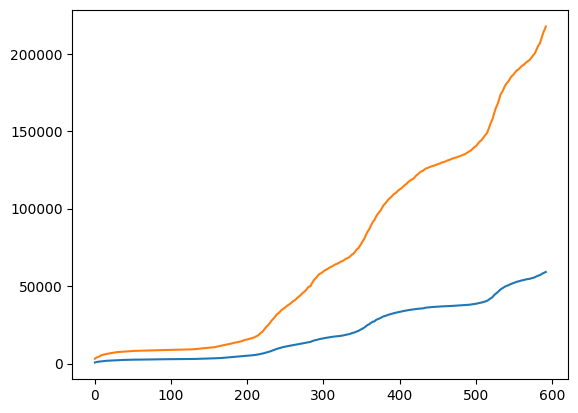

In [27]:
plt.plot(oslo_infected)
plt.plot(norway_infected)
plt.show()

We can also plot the number of new infected each day using the `numpy.diff` function. This will compute the difference between adjacent elements. Notice that the difference is zero if two adjacent elements are the same.

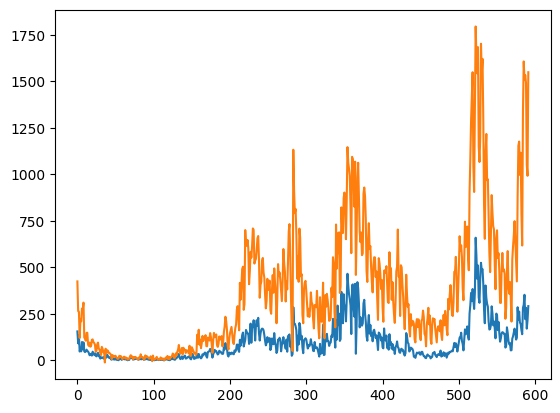

In [28]:
oslo_new_infected = np.diff(oslo_infected)
norway_new_infected = np.diff(norway_infected)
plt.plot(oslo_new_infected)
plt.plot(norway_new_infected)
plt.savefig("new_infected.png")
plt.show()

In both cases, we used `plt.plot` to plot the lines, and in the second plot, we also used `plt.savefig` to save the figure. Using `plt` directly is acceptable if the idea is to obtain a hastily executed but rudimentary plot. However, this is not the recommended way of programmatically creating plots.

### The `matplotlib` object model
The recommended way to create a plot is by working with the *figure* and the *axes*. In one figure, we can have one or more axes, in which case we typically refer to each axis as a subplot. In this case, the plotting is performed on the axes, while the figure is what we eventually save to disk.

Let us rewrite the example above using the object model

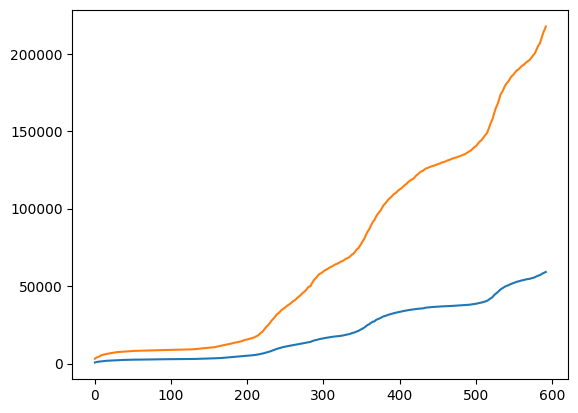

Axes(0.125,0.11;0.775x0.77)


In [29]:
fig, ax = plt.subplots()
ax.plot(oslo_infected)
ax.plot(norway_infected)
plt.show()
print(ax)

### Why use the object model
At this point, it is only natural to question the advantage of using the object model approach over working directly with `plt.`. More explicitly, why should we perform

```python
fig, ax = plt.subplots()
ax.plot(norway_new_infected)
fig.savefig("new_infected.png")
```
instead of the more compact version below?

```python
plt.plot(norway_new_infected)
plt.savefig("new_infected.png")
```
One obvious reason is when working with multiple figures simultaneously, such as when plotting several things within a loop. This situation requires having full control over what and where things are plotted, in addition to which figures contain which axes. An example with subplots is given below.
```python
fig_new_infected, ax_new_infected = plt.subplots()
fig_total_infected, ax_total_infected = plt.subplots()

ax_new_infected.plot(norway_new_infected)
ax_total_infected.plot(norway_infected)

fig_new_infected.savefig("new_infected.png")
fig_total_infected.savefig("total_infected.png")
```
This would not be possible by using `plt.` directly.

By investigating [matplotlib's source code](https://github.com/matplotlib/matplotlib/blob/v3.5.3/lib/matplotlib/pyplot.py#L2765-L2769), we see that what really happens when `plt.plot` is called is the following
```python
# from pyplot.plot:
def plot(*args, **kwargs):
    ax = gca()  # gca = get current axes
    ax.plot(*args, **kwargs)
```
This means that calling `plt.plot` amounts to essentially calling `ax.plot` with only `ax` as the current axes.
The same goes with `plt.figure`, which can be summarized as follows
```python
# from pyplot.savefig
def savefig(*args, **kwargs):
    fig = gcf()  # gcf = get current figure
    fig.savefig(*args, **kwargs)
```

### Anatomy of a plot

A plot is composed of several different objects. So far, we have seen the *Figure*, which is the outermost object consisting of one or more *axes* (the proper object where things get plotted).

At <https://matplotlib.org/_images/anatomy.png> they have a figure summarizing all the different objects in a plot and how to access and change them.

```{figure} https://matplotlib.org/_images/anatomy.png
---
width: 500px
name: mpl_anatomy
alt: mpl_anatomy
---
Anatomy of a Matplotlib plot: Summary of the main objects in a plot
```
- *Figure* is the outermost object in a plot and is the object that gets saved to a file or is shown using `plt.show()`.
- *Axes* are the panels where the plotting is performed. If one figure has more than one axes, we say that those axes form subplots.
- *Axis* (not to be mistaken with axes) refer to the lower horizontal (x-axis) and left vertical (y-axis) parts in the plots.
- *Spines* refer to the four axis lines (left, right, bottom, and top).
- *Ticks* refer to the small lines on the x- and y-axis that are orthogonal to the spines. There are two kinds of ticks: major and minor, where major ticks are simply longer than the minor ticks.
- *Ticklabels* are text explaining the ticks.
- *X- and Ylabels* are text explaining the x- and y-axis.
- *Grid* is the slightly less highlighted set of horizontal and vertical lines typically drawn at each major tick.
- *Lines* are objects that are plotted.
- *Legend* refers to the collection of labels for each line (or plotted object).
- *Title* is a text that contains a description of a given axes.

### Creating subplots
It is easy to make subplots with `plt.subplots`, e.g.

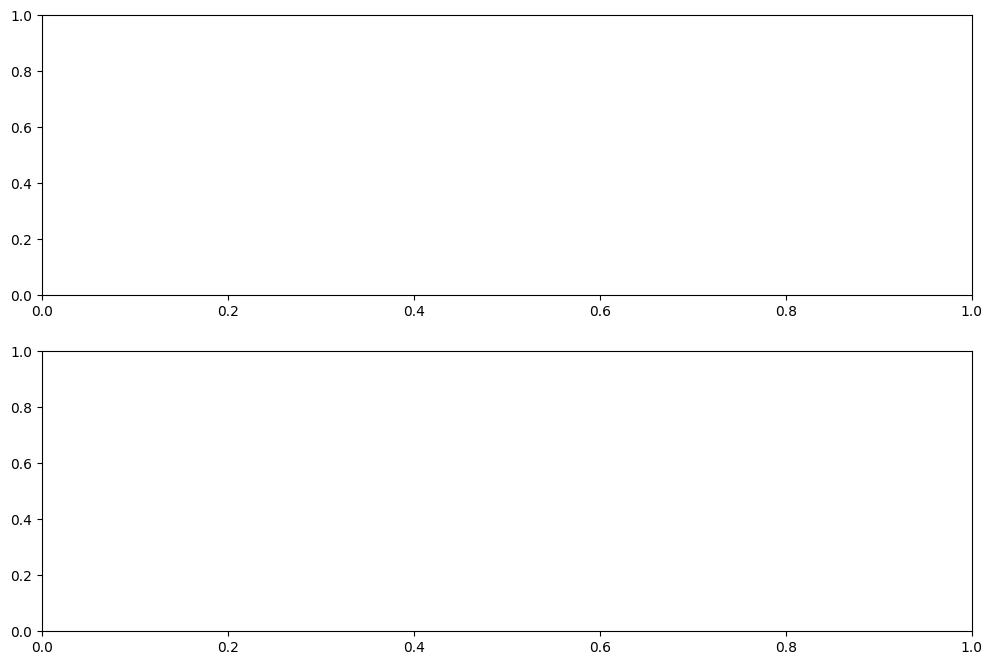

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

We can also see that `axs` now is a NumPy array or length 2

In [31]:
print(axs)
print(type(axs))
print(axs.shape)

[<Axes: > <Axes: >]
<class 'numpy.ndarray'>
(2,)


and the figure is, not surprisingly, a Figure

In [32]:
print(fig)

Figure(1200x800)


We could also make a 2 by 2 subplot, in which case `axs` is a 2 by 2 NumPy array

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
(2, 2)


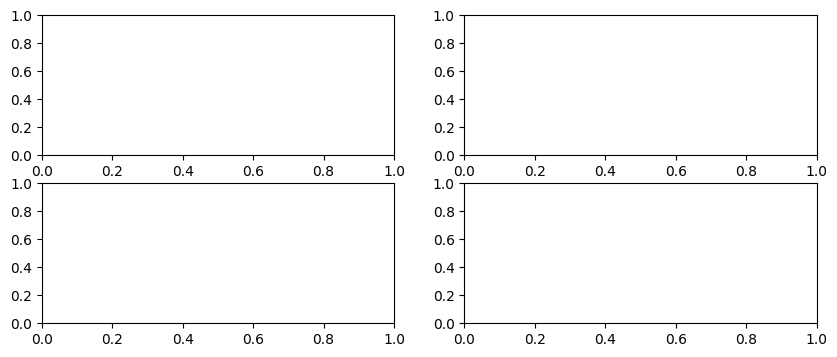

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 4))

print(axs)
print(axs.shape)

### Plotting on different axes
Now that we have seen how to make subplots let us create a figure with two different ones. For that, we create two axes: the first shows the plot of the total number of infected, while the second shows the total number of newly infected.

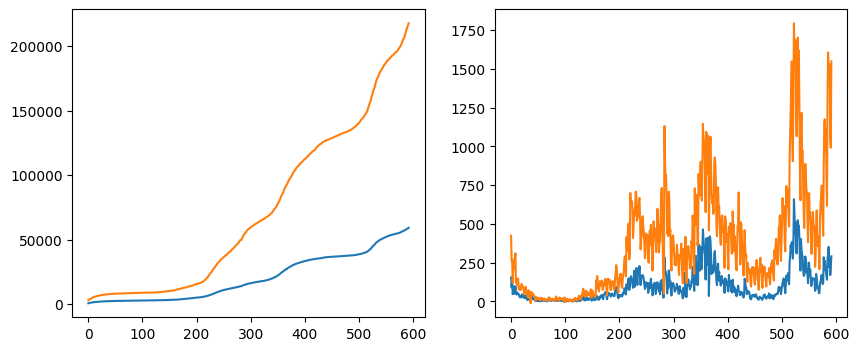

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(oslo_infected)
axs[0].plot(norway_infected)

axs[1].plot(oslo_new_infected)
axs[1].plot(norway_new_infected)
plt.show()

Instead of having the first plot to the left and the second to the right, we can also change the layout to have the first on top of the second by changing the first two arguments in `plt.subplots`.

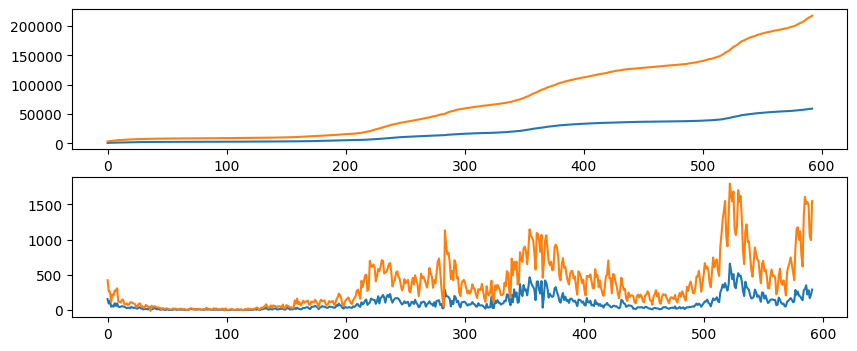

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4))
axs[0].plot(oslo_infected)
axs[0].plot(norway_infected)

axs[1].plot(oslo_new_infected)
axs[1].plot(norway_new_infected)
plt.show()

Similarly, we can use the keyword arguments `nrows` and `ncols`.

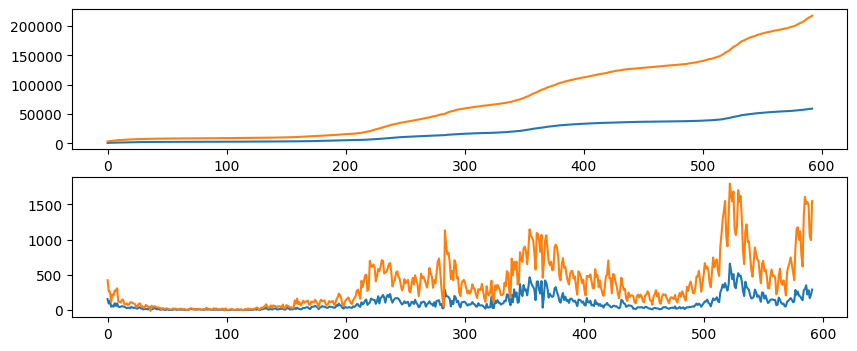

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))
axs[0].plot(oslo_infected)
axs[0].plot(norway_infected)

axs[1].plot(oslo_new_infected)
axs[1].plot(norway_new_infected)
plt.show()

### Sharing axis
When plotting the total infected and the total new infected series, notice the x-axis is the same: the number of days since first the first day registered. We will see later how to properly turn these values into dates, but first, we can also share the axis between the two subplots by passing in the `sharex=True` to `plt.subplots`.

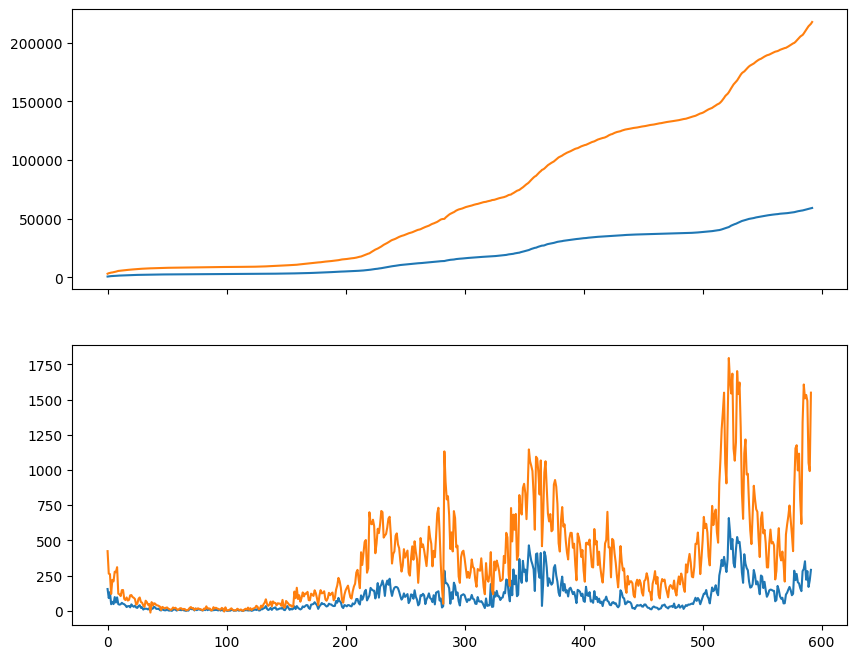

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(oslo_infected)
axs[0].plot(norway_infected)

axs[1].plot(oslo_new_infected)
axs[1].plot(norway_new_infected)
plt.show()

Similarly, we could share the $y$-axis between the subplots by passing in `sharey=True`, although in this specific case, the two plots have very different scales, making this approach undesirable.

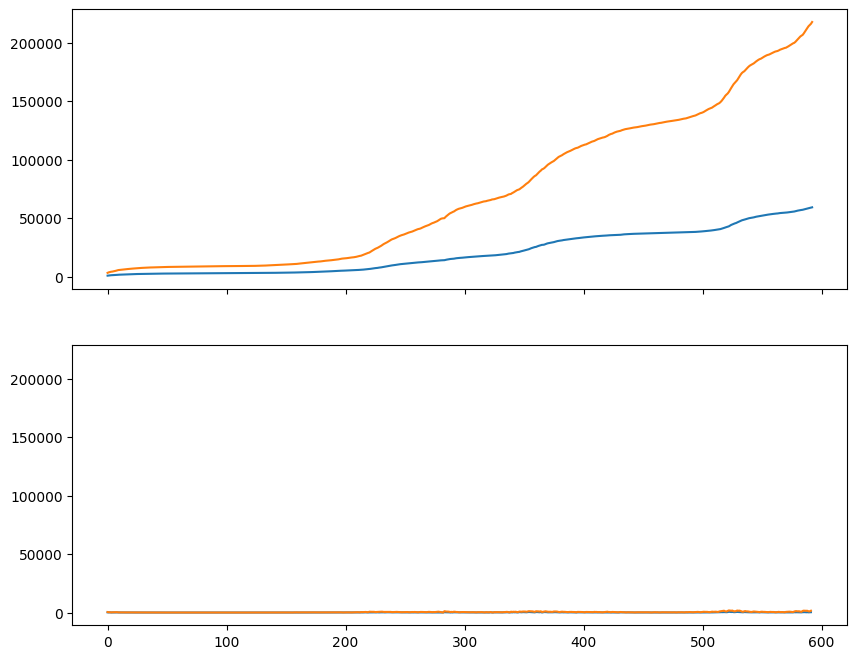

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
axs[0].plot(oslo_infected)
axs[0].plot(norway_infected)

axs[1].plot(oslo_new_infected)
axs[1].plot(norway_new_infected)
plt.show()

### Legends

The simplest way to add a legend to a plot is by sending in the labels to each plot and calling `ax.legend`

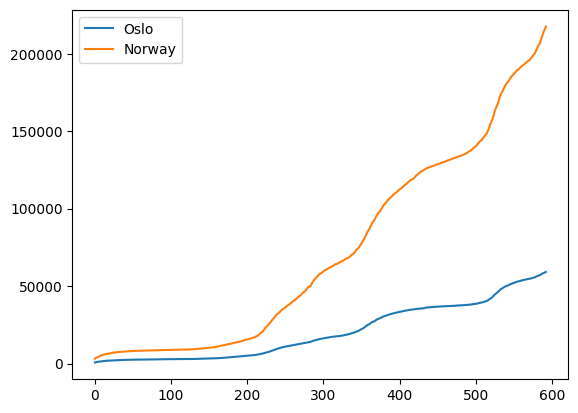

In [39]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.legend()
plt.show()

Another way to create a legend is to keep track of the lines and pass in the lines (also referred to as handles) together with their labels into `ax.legend`

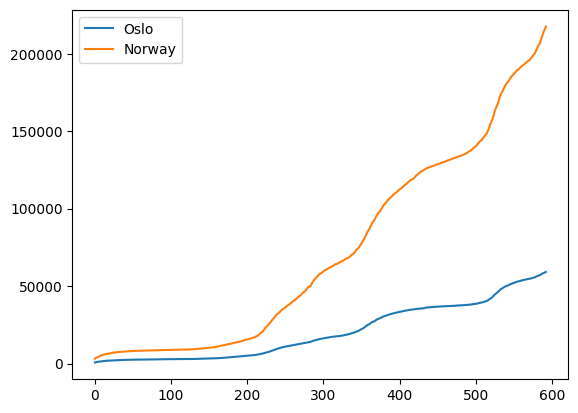

In [40]:
fig, ax = plt.subplots()
(l1,) = ax.plot(oslo_infected)
(l2,) = ax.plot(norway_infected)
ax.legend((l1, l2), ("Oslo", "Norway"))
plt.show()

Note the we write `l1, = ax.plot(oslo_infected)`. This is because `ax.plot` returns a list of lines; in this case, the list returns only one element, which we unpack by adding a comma (`,`). Another approach would be to only pass in the first element from the list of lines

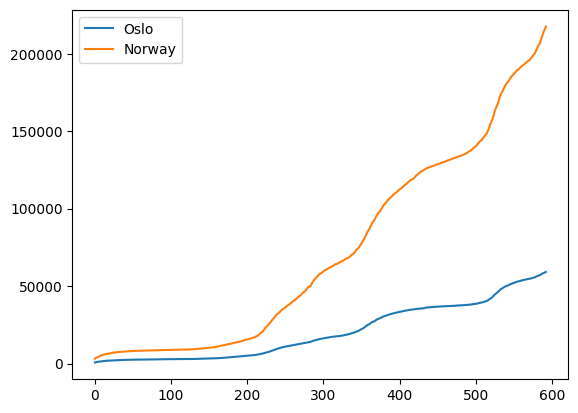

In [41]:
fig, ax = plt.subplots()
l1 = ax.plot(oslo_infected)
l2 = ax.plot(norway_infected)
ax.legend((l1[0], l2[0]), ("Oslo", "Norway"))
plt.show()

#### Placing the legend

The legend location is a plot is not something fixed. Different locations can be chosen via the `loc` argument

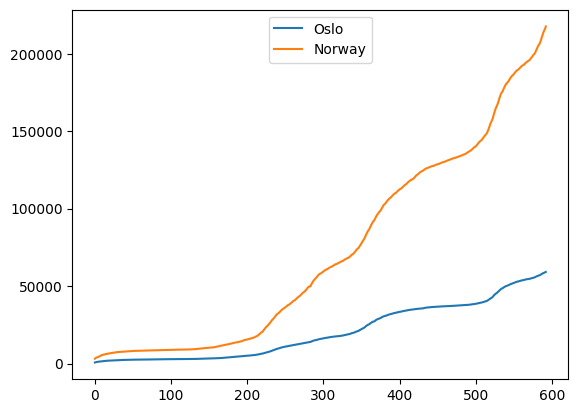

In [42]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.legend(loc="upper center")
plt.show()

In this case, `loc` was set to `"upper center"` which will place the legend in the upper center of the figure.

By default, Matplotlib uses `loc="best"`, in which case it will do its best to position the legend so that it has the minimum overlap with other objects in the figure.

One thing to have in mind is the possibility of placing the legend outside of the plot. This is most easily done by combining `loc` with `bbox_to_anchor`. In this case, `loc` will no longer refer to the figure but to the legend itself, while `bbox_to_anchor` will refer to the location on the figure. For the `bbox_to_anchor` argument, `(0, 0)` refers to the lower left corner, `(0, 1)` refers to the upper left corner, and so on. As an example, `loc="upper left"` combined with `bbox_to_anchor=(0, 1)` will place the upper left corner of the legend in the upper left corner of the figure, as shown below

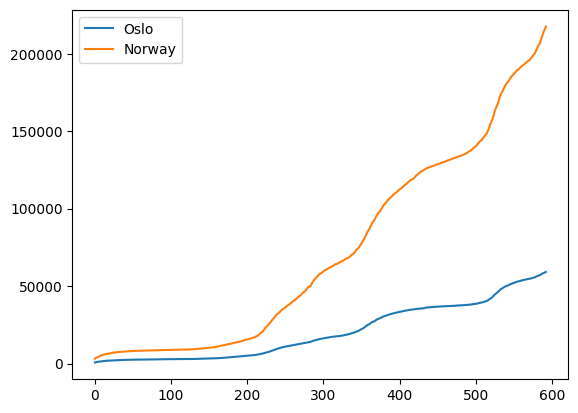

In [43]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.legend(bbox_to_anchor=(0, 1), loc="upper left")
plt.show()

These different options are more easily learned by trying different values of `loc` and `bbox_to_anchor` and seeing what happens.

#### Legends for subplots
When working with multiple subplots, one option is to create a separate legend for each subplot in the same way as we did for a single plot

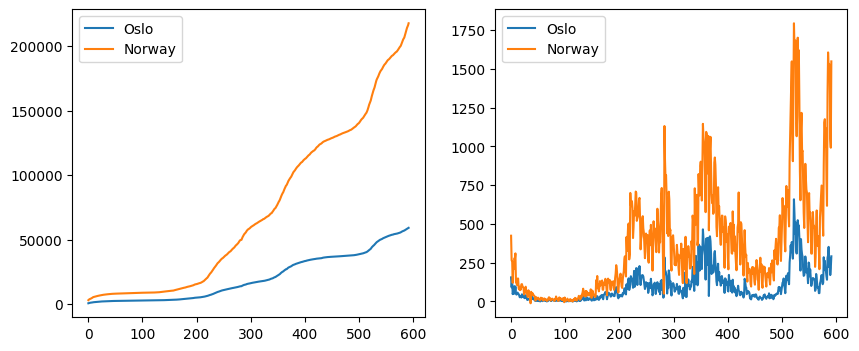

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(oslo_infected, label="Oslo")
axs[0].plot(norway_infected, label="Norway")

axs[1].plot(oslo_new_infected, label="Oslo")
axs[1].plot(norway_new_infected, label="Norway")

for ax in axs:
    ax.legend()
plt.show()

However, this is not always desirable. In our case, we are repeating the same legend in both subplots, so finding a way to make a combined legend would be preferable. One way to achieve this is to add a legend to the second axes

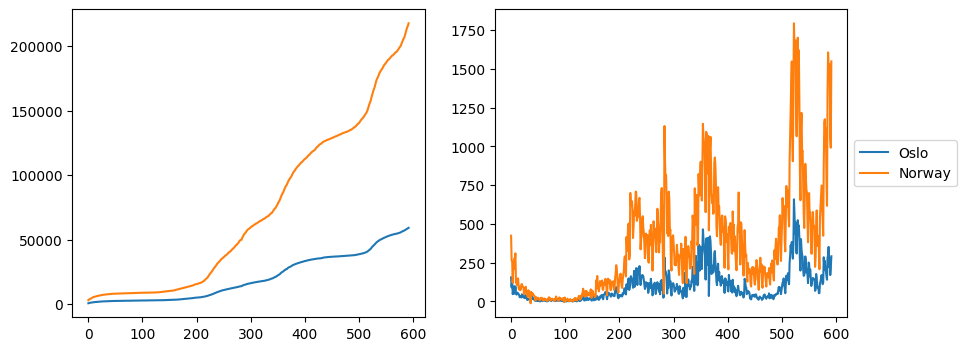

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(oslo_infected, label="Oslo")
axs[0].plot(norway_infected, label="Norway")

axs[1].plot(oslo_new_infected, label="Oslo")
axs[1].plot(norway_new_infected, label="Norway")

axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

However, in this case, it is possible that parts of the legend will be outside of the figure when saving it

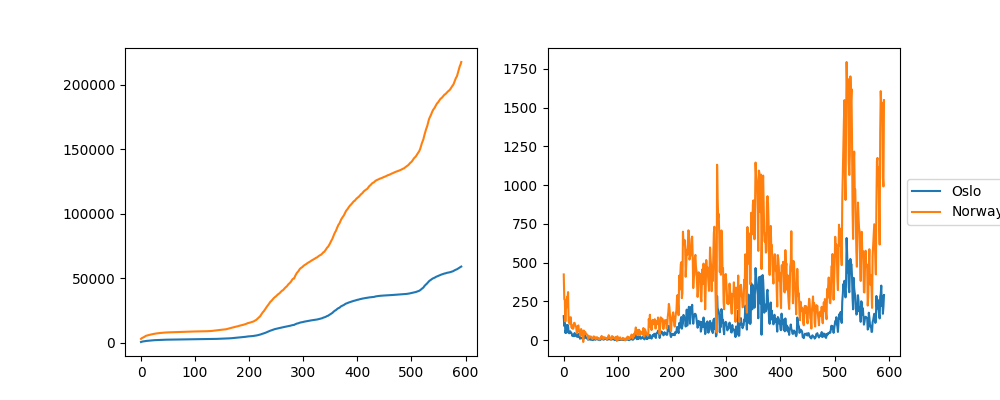

In [46]:
fig.savefig("subplots_legend1.png")
from IPython import display

display.Image("subplots_legend1.png")

This behavior can be corrected by passing `bbox_inches="tight"` to `fig.savefig`

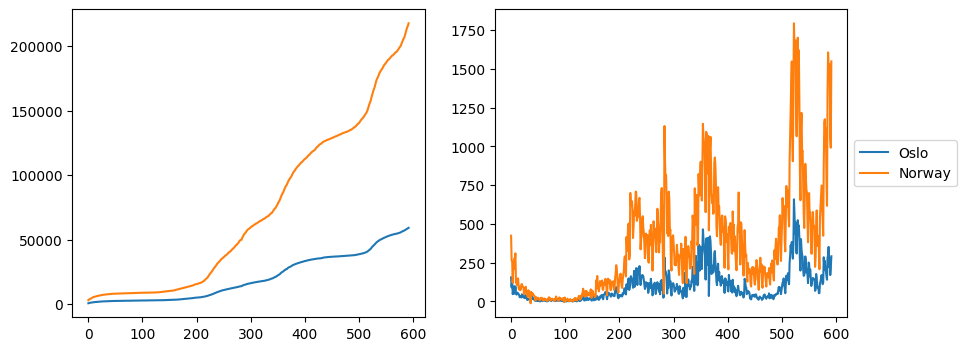

In [47]:
fig.savefig("subplots_legend2.png", bbox_inches="tight")
from IPython import display

display.Image("subplots_legend2.png")

Another way of adding legends in such a way that avoids these saving problems is by adding them to the figure instead of one of the axes

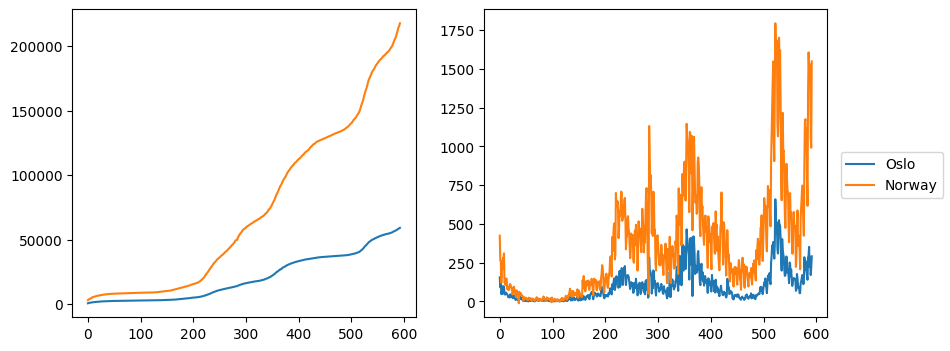

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
(l1,) = axs[0].plot(oslo_infected, color="tab:blue")
(l2,) = axs[0].plot(norway_infected, color="tab:orange")

axs[1].plot(oslo_new_infected, color="tab:blue")
axs[1].plot(norway_new_infected, color="tab:orange")

fig.subplots_adjust(right=0.88)
fig.legend((l1, l2), ("Oslo", "Norway"), loc="center right")
plt.show()

In this case, we first make sure to select the same color for both subplots and extract the lines from one of the subplots that are passed on to `fig.legend` together with the labels. Finally, we use `fig.adjust_subplots` to rescale the subplots so that the legend fits.

### Adding a grid

Adding a grid makes it easier to link the lines to the axis, and we can easily add one using `ax.grid`

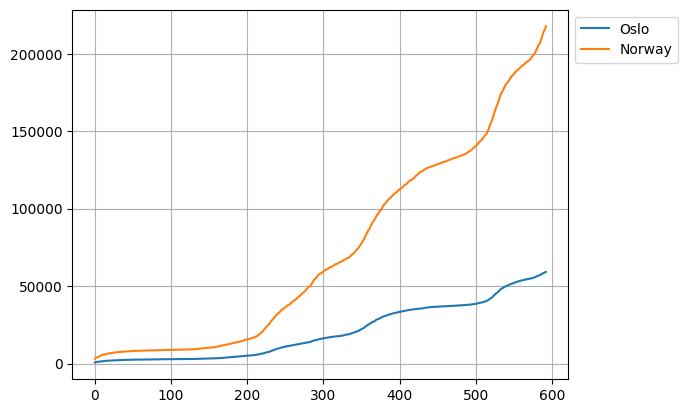

In [49]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.grid()
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

### Adding a title

A title can be added using the `ax.set_title` function

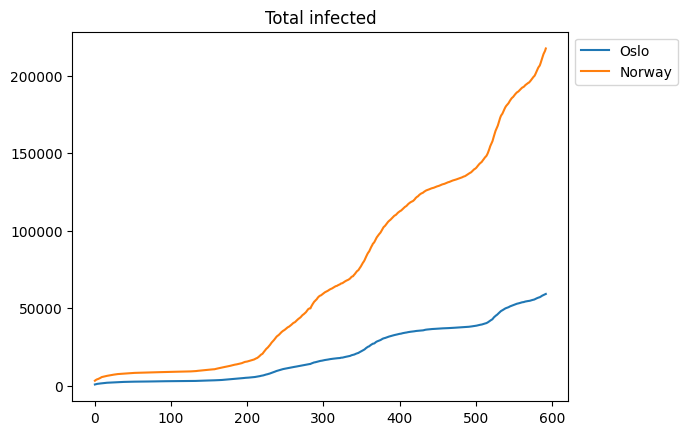

In [50]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.set_title("Total infected")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

### X- and Ylabels
We can add labels to the $x$- and $y$-axis using the `ax.set_xlabel` and `ax.set_ylabel` respectively

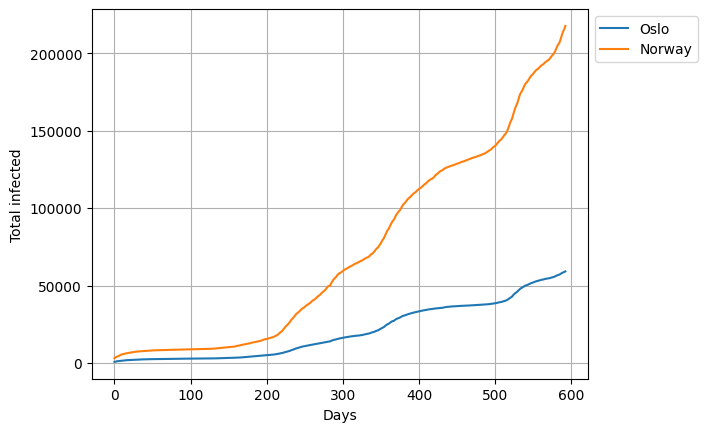

In [51]:
fig, ax = plt.subplots()
ax.plot(oslo_infected, label="Oslo")
ax.plot(norway_infected, label="Norway")
ax.grid()
ax.set_xlabel("Days")
ax.set_ylabel("Total infected")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

### Ticks and Ticklabels

We will now see how we can change the ticks in the plot. The ticks are markers that can be used to label specific points on the $x$- and $y$-axis, as well as the grid lines. To change the ticks on the $x$ or $y$-axis, `ax.set_xticks` and `ax.set_yticks` can be used respectively as follows

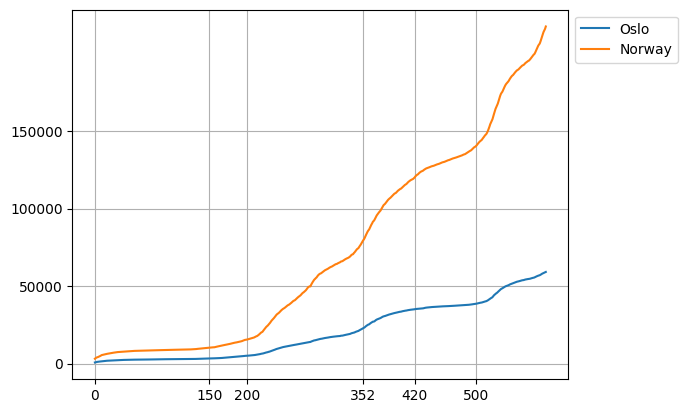

In [52]:
fig, ax = plt.subplots()
x = np.arange(len(oslo_infected))
ax.plot(x, oslo_infected, label="Oslo")
ax.plot(x, norway_infected, label="Norway")
ax.grid()
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_yticks([0, 50_000, 100_000, 150_000])
ax.set_xticks([0, 150, 200, 352, 420, 500])
plt.show()

Notice that it is possible to set ticks to only one of the axis if that is desired.

It is common to combine `ax.set_xticks` with `ax.set_xticklabels` in order to change the labels as the different tick points

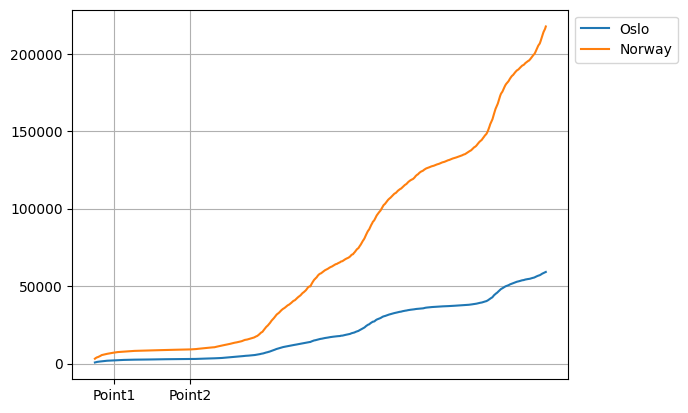

In [53]:
fig, ax = plt.subplots()
x = np.arange(50, len(oslo_infected) + 50)
ax.plot(x, oslo_infected, label="Oslo")
ax.plot(x, norway_infected, label="Norway")
ax.grid()
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xticks([75, 175])
ax.set_xticklabels(["Point1", "Point2"])
plt.show()

#### Changing the tick labels from points to dates

Now that we have learned the basics of ticks and tick labels, we would like to use this knowledge to change the tick labels from points since first day of registration to dates. The dates are stored as column names in the original data frame starting at index 6

In [54]:
dates = df.keys().to_numpy()[6:]
print(dates[:10])  # printing the first 10 dates

['2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30'
 '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04']


Here we also convert the keys to a NumPy array using the method `.to_numpy`. Suppose we want to have 6 ticks on the $x$ axis with 6 equally spaced dates. We can obtain this by first creating a linearly spaced array of 6 values starting at zero and ending at the length of the `dates` array. This array, which will be our `xticks`, corresponds to the indices of the dates and can be obtained using NumPy's `np.linspace`

In [55]:
xticks = np.linspace(0, len(oslo_infected) - 1, 6).astype(int)

We also need to convert these values to integers so that we can get the `xticklabels`

In [56]:
xticklabels = dates[xticks]

The rest of the process is rather straightforward

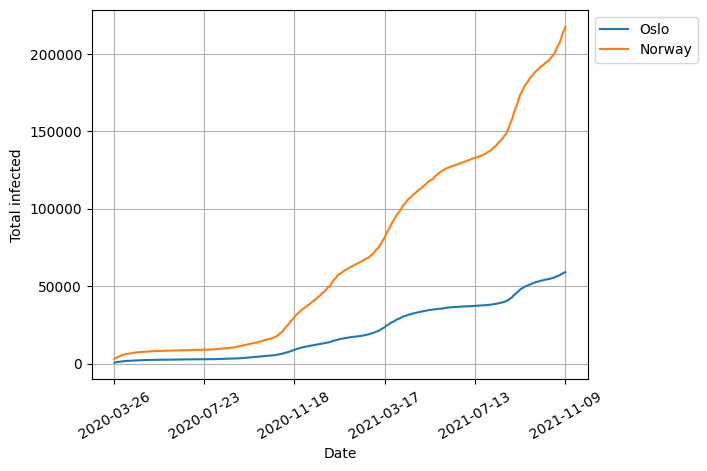

In [57]:
fig, ax = plt.subplots()
x = np.arange(len(oslo_infected))
ax.plot(x, oslo_infected, label="Oslo")
ax.plot(x, norway_infected, label="Norway")
ax.grid()
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=30)
ax.set_xlabel("Date")
ax.set_ylabel("Total infected")
plt.show()

Here we also added a 30-degree rotation to the tick labels so that they do not overlap.

#### Changing tick labels on subplots
We are now at a point where we can do some advanced configurations on our plots. We can, for example, add custom ticks represented by the dates to the two subplots and also share the x-axis between them. As an extra exercise, we will try to add the legend to the center of the plot.

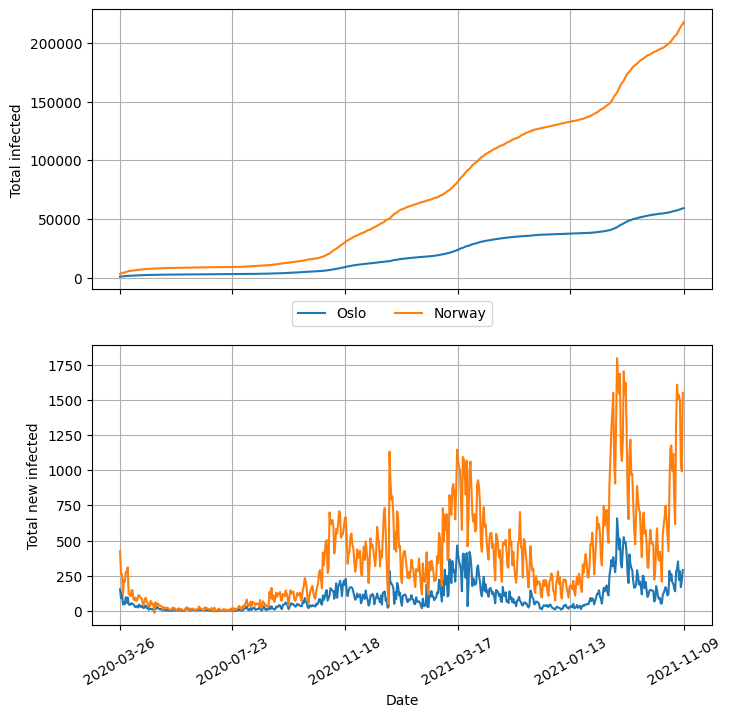

In [58]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
(l1,) = axs[0].plot(x, oslo_infected)
(l2,) = axs[0].plot(x, norway_infected)
axs[0].set_ylabel("Total infected")

axs[1].plot(x[:-1], oslo_new_infected)
axs[1].plot(x[:-1], norway_new_infected)
axs[1].set_ylabel("Total new infected")

for ax in axs:
    ax.grid()
    ax.set_xticks(xticks)

# We only add the labels to the bottom axes
axs[1].set_xticklabels(xticklabels, rotation=30)
axs[1].set_xlabel("Date")

fig.legend(
    (l1, l2), ("Oslo", "Norway"), bbox_to_anchor=(0.5, 0.5), loc="center", ncol=2
)
plt.show()

### Choosing a different style

So far, we have worked with the default fonts and styles from Matplotlib, but there is, of course, a large list of different styles that can be applied. The list of the available styles can be seen by printing `plt.style.available`

In [59]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


We can switch to a new style using `plt.style.use` as shown below

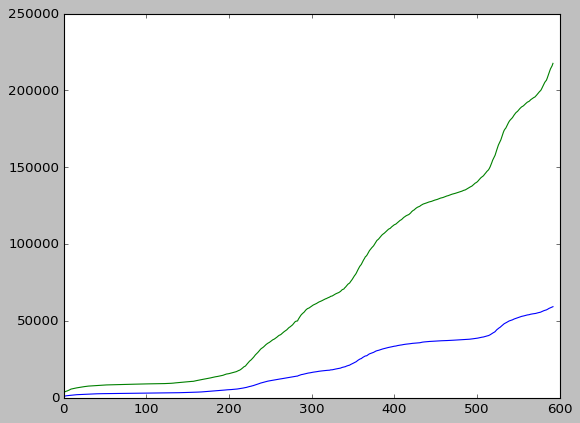

In [60]:
plt.style.use("classic")
fig, ax = plt.subplots()
ax.plot(oslo_infected)
ax.plot(norway_infected)
plt.show()

After this is done, any plot produced during this session will use this style unless we switch to another one. We can change back to the default style if desired, using

In [61]:
plt.style.use("default")

It is also possible to only apply a style within a given context. This can be achieved using a context manager (or a `with`-block).

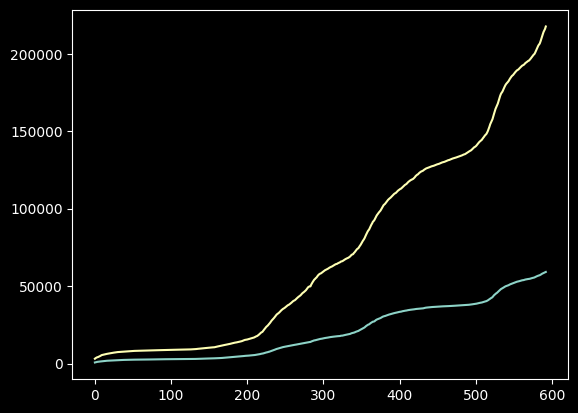

In [62]:
with plt.style.context("dark_background"):
    # Style will only be applied within this block
    fig, ax = plt.subplots()
    ax.plot(oslo_infected)
    ax.plot(norway_infected)
    plt.show()

# Now we fall back to the default style again

### Styling lines
When adding lines to a plot, there are several different options for styling. It is possible, for example, to change the `linestyle`, `color`, `marker`, `markersize`, and `linewidth` just to name a few options.
The code snipped below illustrates what some of these options do.

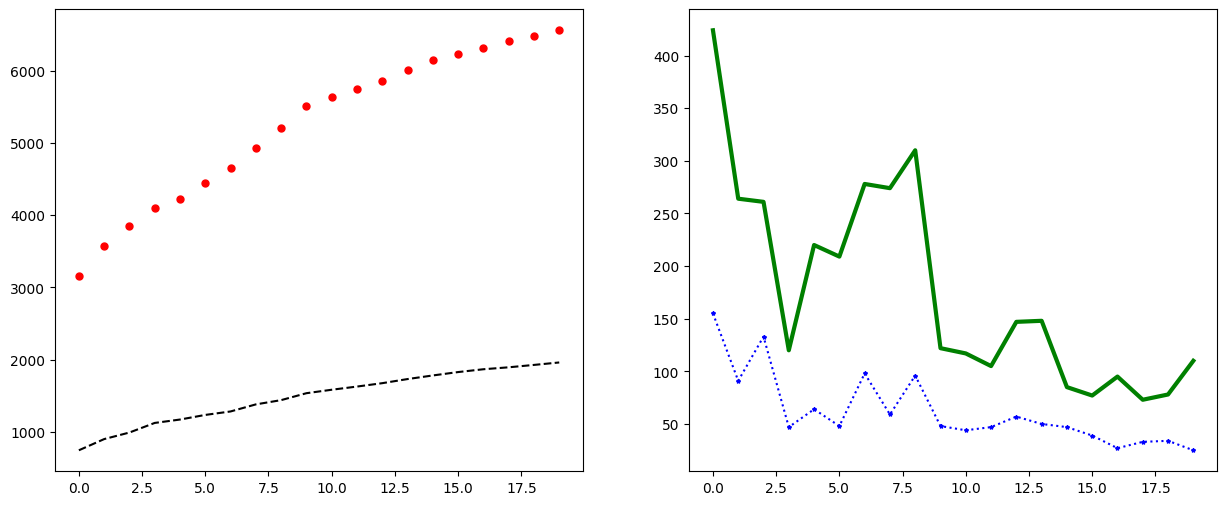

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(oslo_infected[:20], linestyle="--", color="k")
axs[0].plot(norway_infected[:20], linestyle="", marker=".", color="r", markersize=10)

axs[1].plot(oslo_new_infected[:20], linestyle=":", marker="*", markersize=3, color="b")
axs[1].plot(norway_new_infected[:20], linestyle="-", linewidth="3", color="g")
plt.show()

### Plotting many lines with different colors and markers
Now consider plotting the total number of infected in each municipality in Rogaland fylke.

In [64]:
rogaland = df[df["fylke_name"] == "Rogaland"]
print(len(rogaland))

23


We notice that this DataFrame contains 23 rows, making it quite difficult to visualize. One thing we can do to mitigate this is to specify the colors and markers we would like to use

In [65]:
colors = ["r", "b", "g", "y", "c", "m"]
markers = ["x", "v", "o", "<", "."]

After defining those lists, we can use a method called `cycle` from the `itertools` library to cycle through the colors and makers. For example, if we have 8 values, we would get the following combinations

In [66]:
from itertools import cycle

for i, color, marker in zip(range(8), cycle(colors), cycle(markers)):
    print(i, color, marker)

0 r x
1 b v
2 g o
3 y <
4 c .
5 m x
6 r v
7 b o


Note that the list of colors and markers has less than 8 entries, but the `cycle` method will forever loop, continuing at the first element once the end of the list is reached. The reason this `for` loop ends is because `zip` terminates when the first iterable is exhausted, which in this case will be `range(8)`.

Let us plot the total number of infected within each municipality in Rogaland

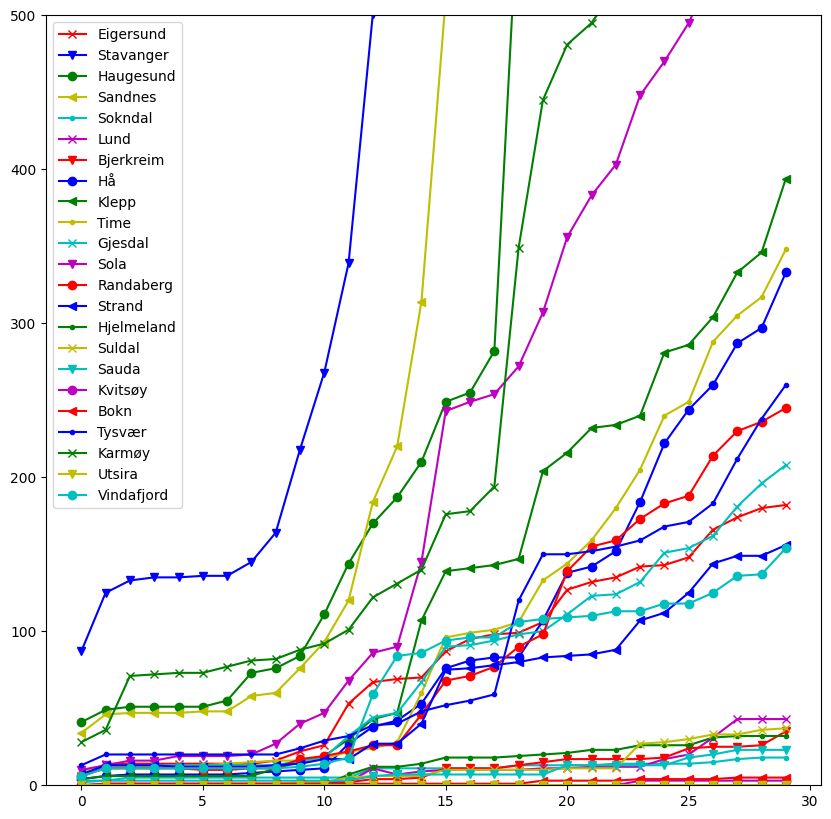

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
for x, marker, color in zip(rogaland.values, cycle(markers), cycle(colors)):
    name = x[2]  # Municipality name is at the second index
    v = x[6:]  # Data is from index 6 and onwards
    # Let ut plot every 20th value with the given marker and color
    # and give the name as a label
    ax.plot(v[::20], label=name, marker=marker, color=color)

# Also set a limit on the y-axis so that it is a bit easier to see
# the difference
ax.set_ylim((0, 500))
ax.legend()
plt.show()

### Colormaps

Colormaps are a tool built into Matplotlib that enables the mapping of numerical data to colors. This means that points, lines or surfaces can be easily differentiated or grouped in a spectrum of colors that in essence can be thought of as another dimension of the plot. Colormaps can therefore be used to add new information via the colors to a plot or, to enhance the readability and interpretation of complex information that is already in the plots.

```{figure} ../../figures/3D_Surface_Plot_from_Virtual_Matrix.png
---
width: 500px
name: 3D_Surface_Plot_from_Virtual_Matrix
alt: 3D_Surface_Plot_from_Virtual_Matrix
---
Source: https://www.originlab.com/www/products/GraphGallery.aspx?GID=279.
```

In the above image, the colormap in the three-dimensional surface serves merely to help identify or group the points with higher amplitude, as this information was already in one of the axes. Notice, however, that when the colormap is used in the bi-dimensional projection, it adds the information from the third axis by introducing the color.

There is a [large list](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) of available colormaps in Matplotlib, and selecting a good one is important because it can significantly affect the interpretation of data. The video below highlights this by showing that the default colormap in Matplotlib 2.0, called "Jet", has a series of problems such as uneven changes in brightness which can create visual artifacts such as false boundaries, leading to misinterpretations. Since Matplotlib version 2.0, "viridis" has been the default colormap, which is the one presented in the video.

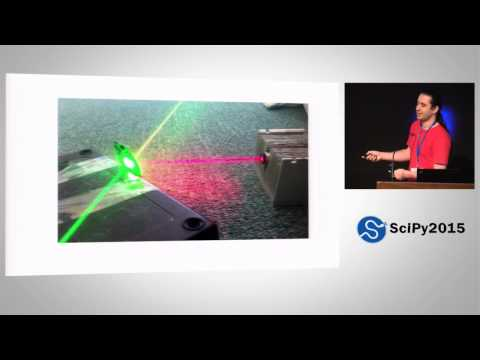

In [68]:
from IPython.display import YouTubeVideo

YouTubeVideo("xAoljeRJ3lU")

### Seaborn

Seaborn is a popular library used for data visualization in the data science niche. It is built on top of Matplotlib and provides a high-level interface for creating complex plots, with several statistical analysis options, which Matplotlib does not provide natively. On top of extra statistical analysis options, Seaborn offers color pallets and styles that are designed to create attractive plots easily. Furthermore, Seaborn offers very intuitive integration with pandas DataFrames. Seaborn can be installed via pip,

```
python3 -m pip install seaborn
```

Seaborn also offers great [documentation](https://seaborn.pydata.org/index.html), with several examples of practical use cases and beautiful plots.


Take as an example, the creation of a [correlation matrix](https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp) in the form of heatmaps. The two code cells below illustrate how using the Seaborn library can sometimes be more direct and readable when compared to using pure Matplotlib functionalities.

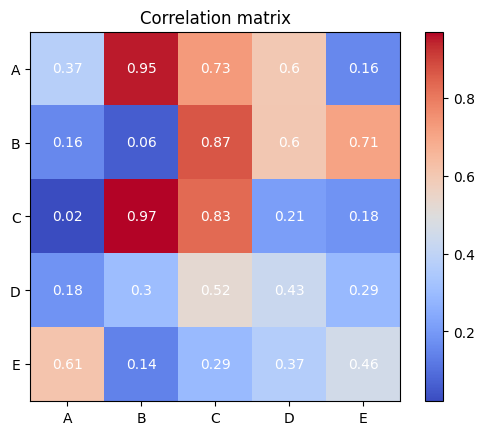

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample correlation matrix
np.random.seed(42)
corr = np.random.rand(5, 5)

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the heatmap
im = ax.imshow(corr, cmap="coolwarm")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(range(corr.shape[0]))
ax.set_yticks(range(corr.shape[0]))
ax.set_xticklabels(["A", "B", "C", "D", "E"])
ax.set_yticklabels(["A", "B", "C", "D", "E"])

# Show values in the heatmap
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(
            j, i, np.round(corr[i, j], 2), ha="center", va="center", color="w"
        )

plt.title("Correlation matrix")
plt.show()

Seaborn implementation, on the other hand, takes only a small number of lines and generates a better-looking visualization more easily.

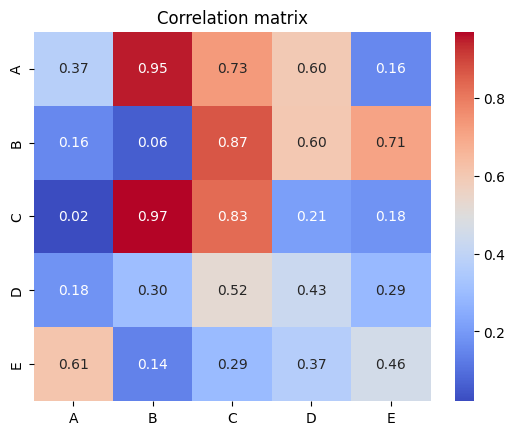

In [70]:
import seaborn as sns
import numpy as np

# Create a sample correlation matrix
np.random.seed(42)
corr = np.random.rand(5, 5)

# Create the heatmap
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    xticklabels=["A", "B", "C", "D", "E"],
    yticklabels=["A", "B", "C", "D", "E"],
)

plt.title("Correlation matrix")
plt.show()

## Python's visualization landscape


```{figure} ../../figures/PythonVisLandscape.png
---
width: 500px
name: PythonVisLandscape
alt: PythonVisLandscape
---
Figure from the highly recommended Anaconda blog post (https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries).
```

As can be seen from the image above, Python's visualization landscape can be a dauntingly vast one but the most popular libraries by far are Matplotlib, Seaborn, Plotly, and Bokeh.
While a good portion of the utilities can largely overlap, each library offers unique capabilities and customization options. For instance, while Seaborn and Matplotlib are commonly used in a wide range of fields, Plotly and Bokeh are popular for (but not limited to) interactive and web-based applications.



## Resources

The [scientific visualization book](https://github.com/rougier/scientific-visualization-book) is a valuable resource for those who want to explore the more advanced features of Matplotlib. It provides comprehensive guidance on how to create complex visualizations and implement customizations to meet specific needs.

In addition to the scientific visualization book, the official websites for Matplotlib and pandas, <https://matplotlib.org> and <https://pandas.pydata.org> respectively, are excellent sources of documentation. They provide detailed explanations of the libraries' functionalities, with examples and tutorials that can help users get started with data visualization in Python.